In [18]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load all data
pop_df = pd.read_csv("eth_admpop_adm1_2022_v2.csv")
primary_df = pd.read_csv("ethiopia_education_data_Primary.csv")
secondary_df = pd.read_csv("ethiopia_education_data_Secondary.csv")

# ----------------------------
# Clean Education Data
# ----------------------------
def clean_education_data(df, level):
    df = df.copy()
    df.columns = df.columns.str.strip()
    df['region'] = df['region'].str.strip()
    total_cols = [col for col in df.columns if 'Total' in col]
    df[total_cols] = df[total_cols].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
    df['Education_Level'] = level
    return df[['region'] + total_cols]

primary_clean = clean_education_data(primary_df, 'Primary')
secondary_clean = clean_education_data(secondary_df, 'Secondary')

# Rename for clarity
primary_clean = primary_clean.rename(columns={"2022/23 Total": "Total_primary"})
secondary_clean = secondary_clean.rename(columns={"2022/23 Total": "Total_secondary"})

# Merge primary and secondary
edu_df = pd.merge(primary_clean, secondary_clean, on="region")

# Compute total enrolled
edu_df['Total_enrolled'] = edu_df['Total_primary'] + edu_df['Total_secondary']

# ----------------------------
# Clean Population Data
# ----------------------------
pop_df['region'] = pop_df['admin1Name_en'].str.strip()
pop_df['P_eligible'] = pop_df['T_05_09'] + pop_df['T_10_14']
pop_df['S_eligible'] = pop_df['T_15_19']
pop_df['Eligible_population'] = pop_df['P_eligible'] + pop_df['S_eligible']

pop_clean = pop_df[['region', 'P_eligible', 'S_eligible', 'Eligible_population']]

# ----------------------------
# Merge All
# ----------------------------
final_df = pd.merge(edu_df, pop_clean, on="region", how="left")

# ----------------------------
# Feature Engineering
# ----------------------------
final_df['Literacy_percent'] = (final_df['Total_enrolled'] / final_df['Eligible_population']) * 100

# Optional: save for future use
final_df.to_csv("final_literacy_dataset.csv", index=False)


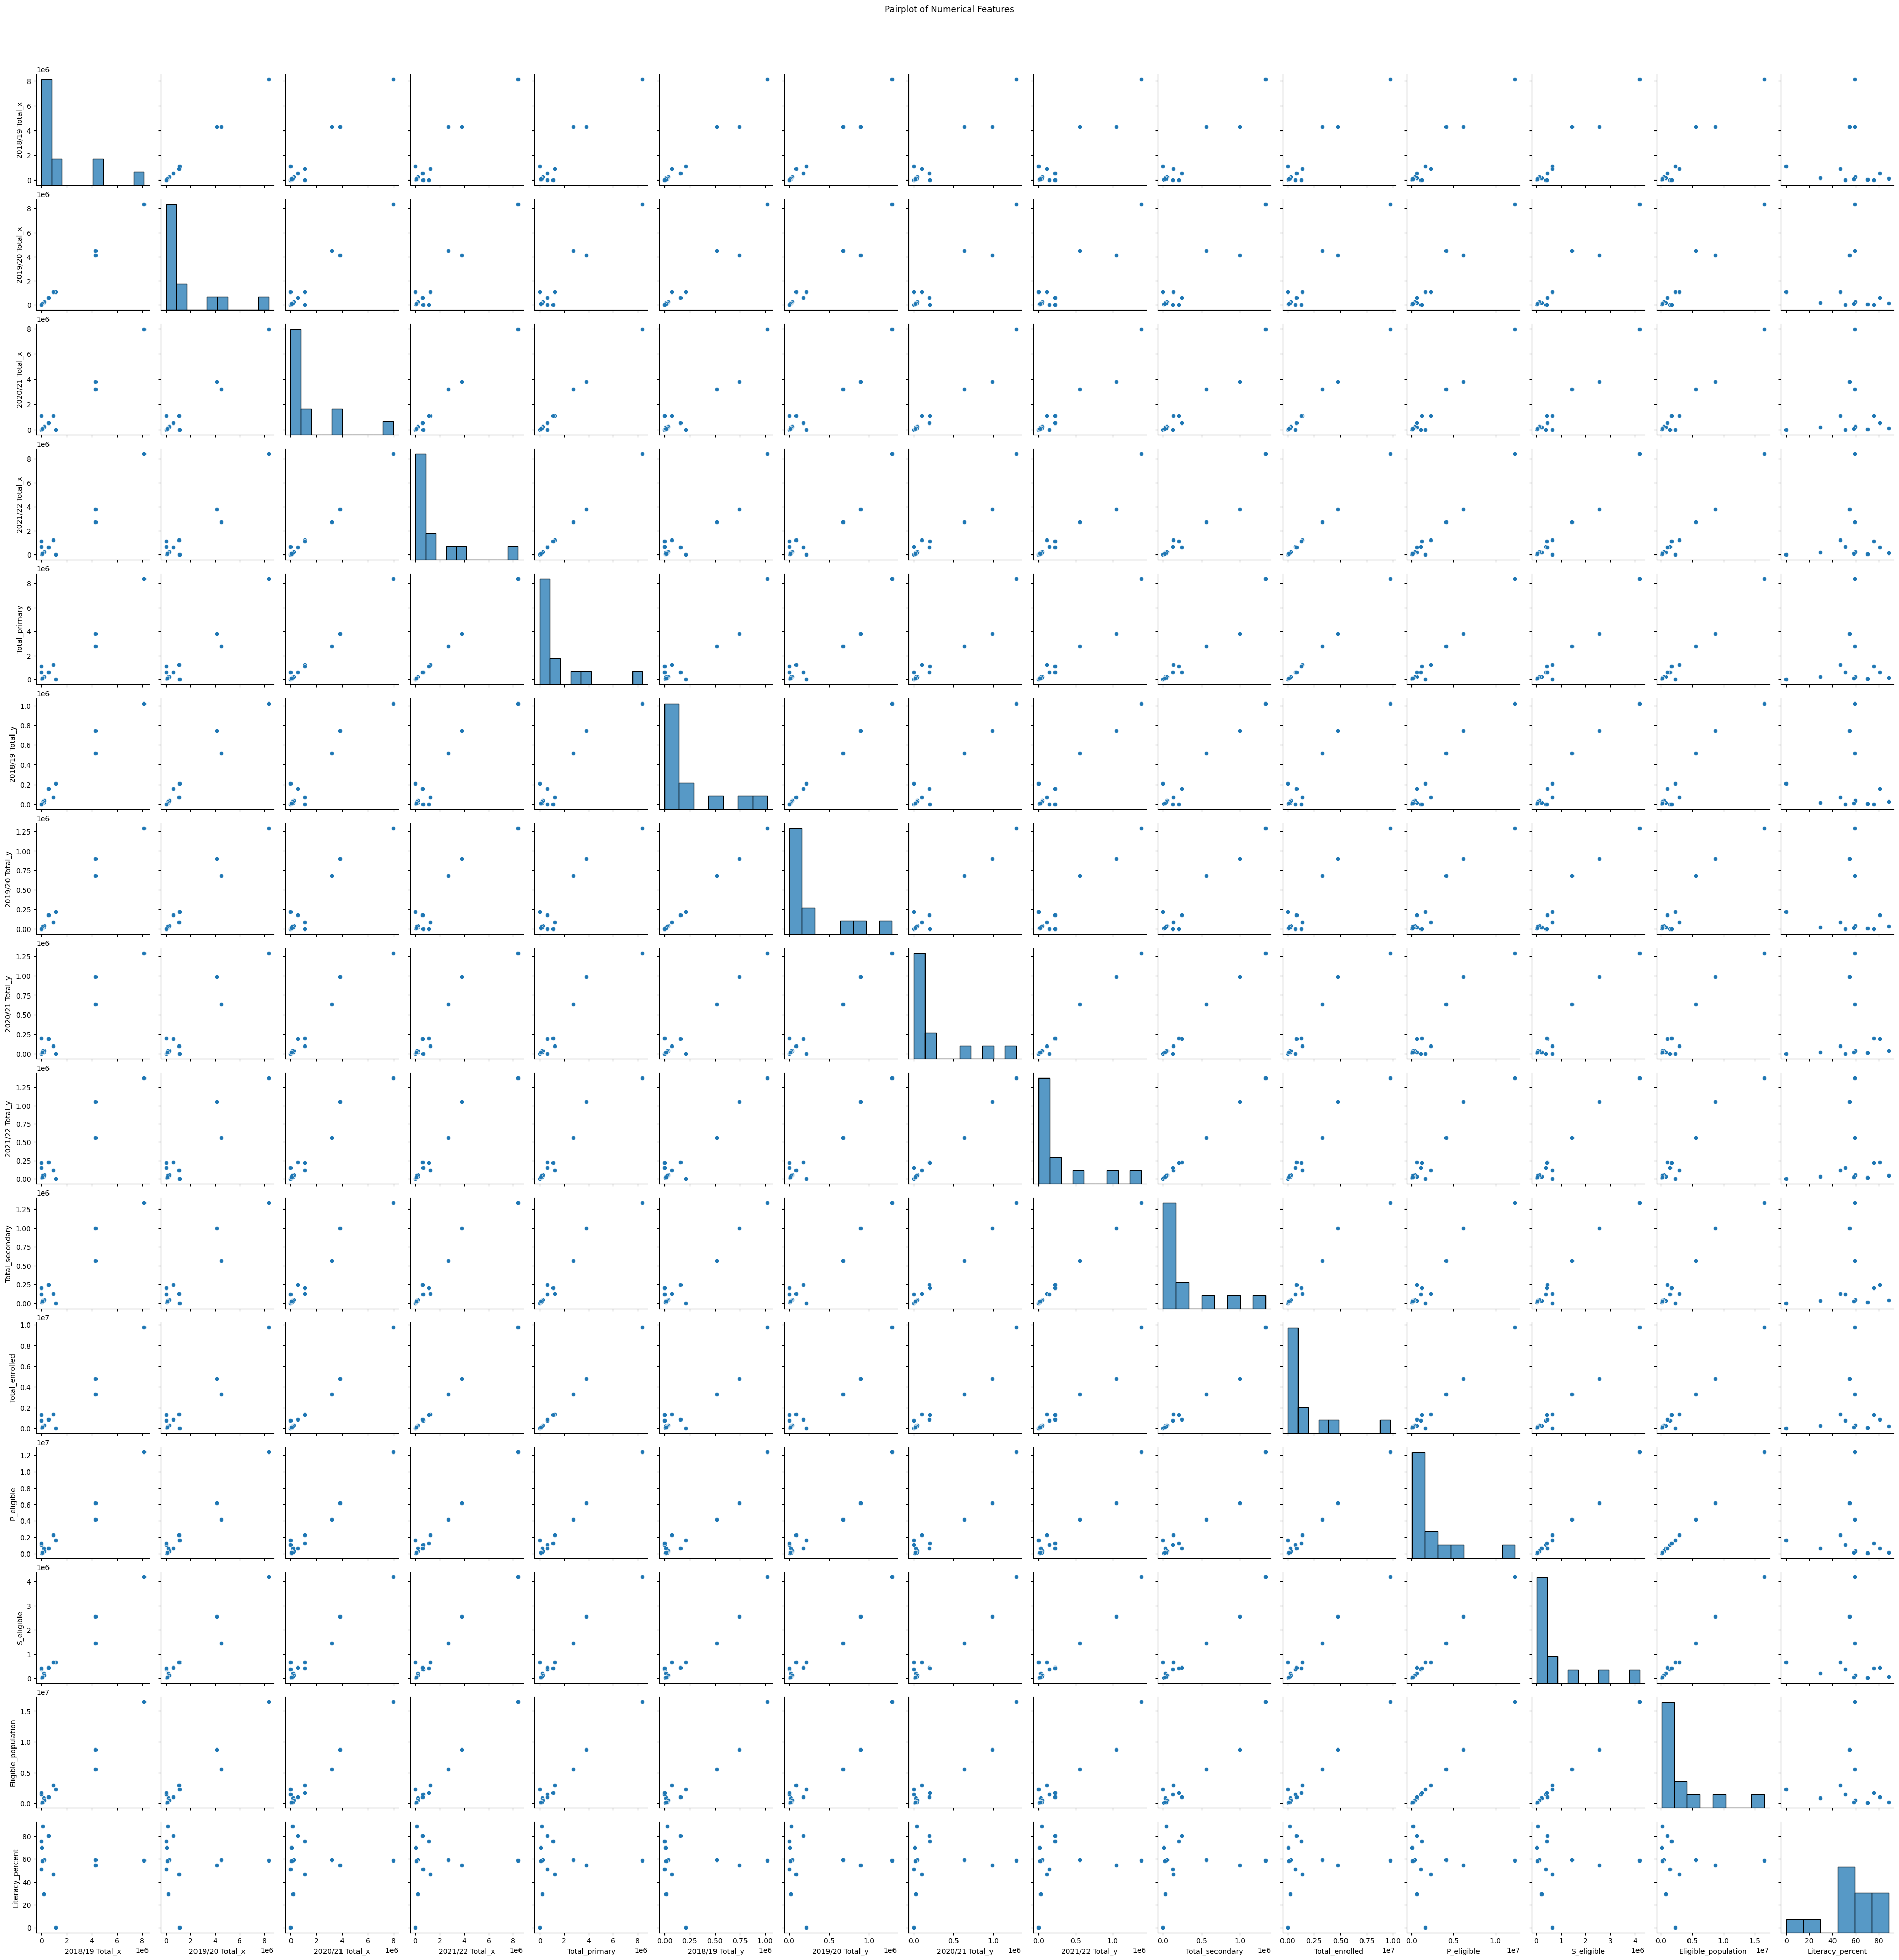

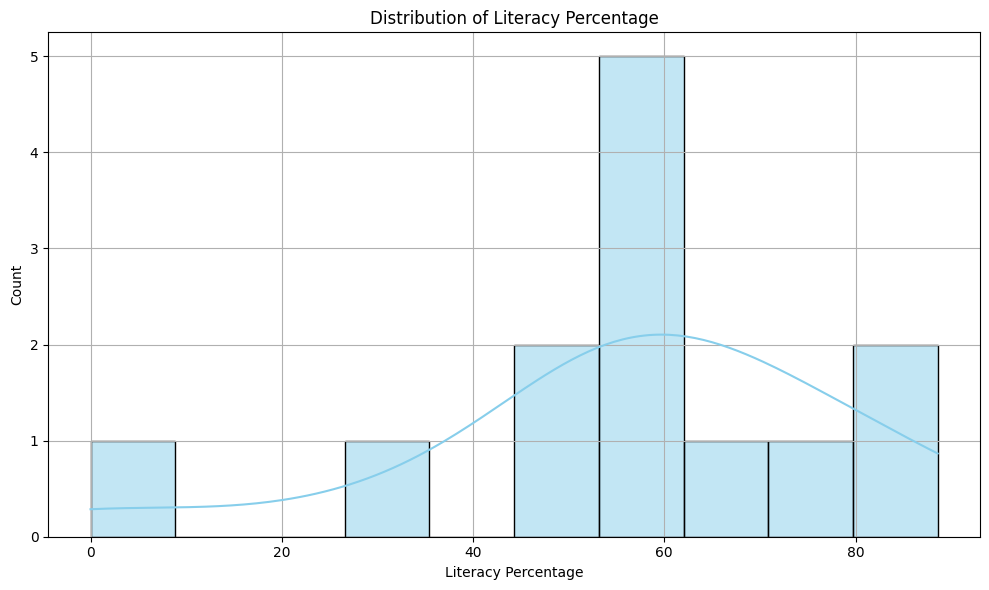

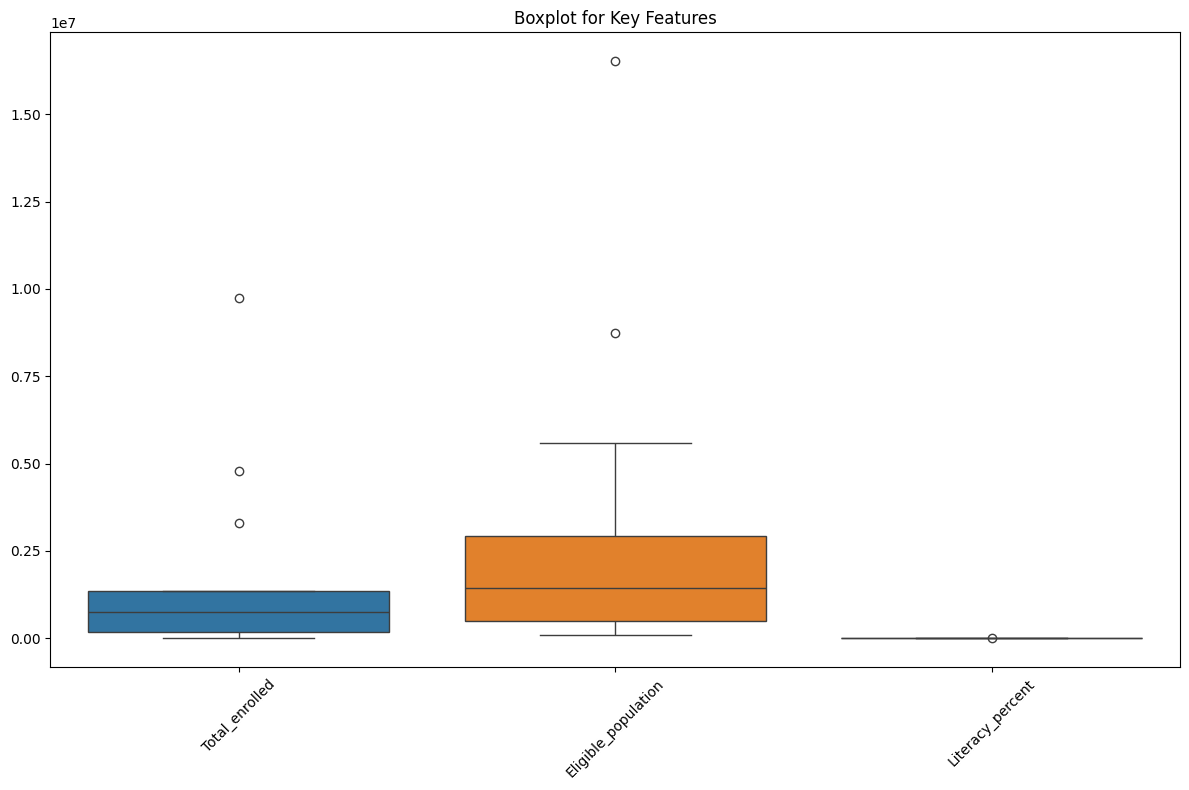

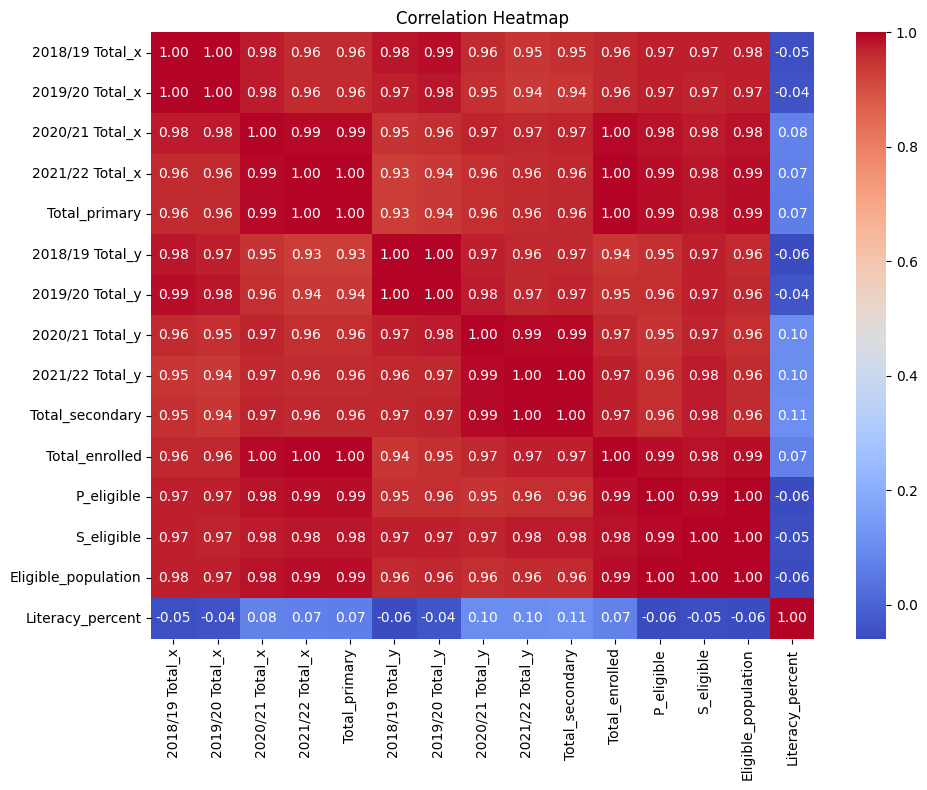

In [2]:
# Pairplot
sns.pairplot(final_df.select_dtypes(include='number'))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Histogram of Literacy Percent
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Literacy_percent'], kde=True, bins=10, color='skyblue')
plt.title("Distribution of Literacy Percentage")
plt.xlabel("Literacy Percentage")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot for Outlier Detection
plt.figure(figsize=(12, 8))
sns.boxplot(data=final_df[['Total_enrolled', 'Eligible_population', 'Literacy_percent']])
plt.title("Boxplot for Key Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(final_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [3]:
final_df

region  2018/19 Total_x  2019/20 Total_x  2020/21 Total_x  \
0                Tigray          1133838          1093565                0   
1                  Afar           184169           179231           193061   
2                Amhara          4292424          4106009          3817016   
3                Oromia          8140833          8356150          7978121   
4                Somali           933559          1065934          1093654   
5      Benishangul-Gumz           252619           248070           233942   
6                  SNNP          4293712          4515880          3197903   
7   South West Ethiopia                0                0                0   
8              Gambella           119032           128092           134759   
9                Harari            51345            55589            54058   
10          Addis Ababa           564722           589662           556641   
11            Dire Dawa            80104            80970            81242   
12               Sidama                0                0          1107100   

    2021/22 Total_x  Total_primary  2018/19 Total_y  2019/20 Total_y  \
0                 0              0           209405           217197   
1            198959         208004            15654            20223   
2           3796673        3781487           743753           894355   
3           8404818        8407777          1020127          1289027   
4           1225266        1226991            70853            88619   
5            233173         237778            37515            41699   
6           2709156        2739221           517543           678938   
7            644644         620815                0                0   
8            134368         139617            25694            31038   
9             57054          58276             8154             8969   
10           614215         605667           158450           181068   
11            83957          86772            12987            15839   
12          1117617        1068005                0                0   

    2020/21 Total_y  2021/22 Total_y  Total_secondary  Total_enrolled  \
0                 0                0                0               0   
1             22398            27730            31666          239670   
2            982847          1053116           998768         4780255   
3           1290792          1383558          1335976         9743753   
4            102341           116520           132317         1359308   
5             42958            49555            49718          287496   
6            637318           560444           564145         3303366   
7                 0           147161           125410          746225   
8             36946            43536            43182          182799   
9             11201            13507            13594           71870   
10           193331           227477           245974          851641   
11            18834            23307            24377          111149   
12           201358           221552           204060         1272065   

    P_eligible  S_eligible  Eligible_population  Literacy_percent  
0      1647159      656076              2303235          0.000000  
1       611535      209462               820997         29.192555  
2      6172763     2553372              8726135         54.780897  
3     12335742     4181816             16517558         58.990276  
4      2256020      659338              2915358         46.625766  
5       348238      135718               483956         59.405400  
6      4137646     1445838              5583484         59.163168  
7      1078374      376821              1455195         51.280069  
8       145594       60753               206347         88.588155  
9        74189       28361               102550         70.082886  
10      613914      440931              1054845         80.736127  
11      135501       55512               191013         58.189233  
12     1

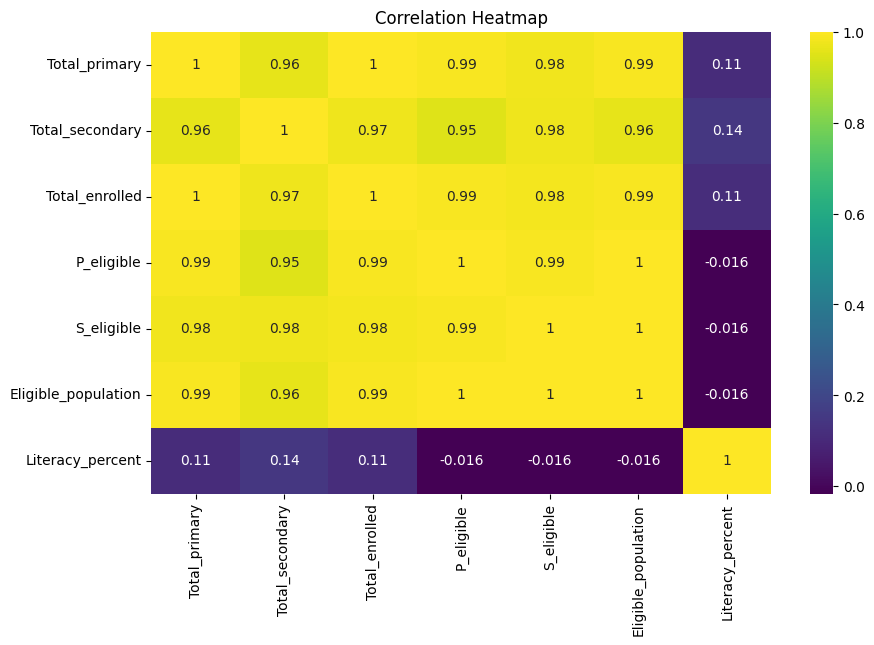

MAE: 32.13
RMSE: 43.84
RÂ² Score: 0.12


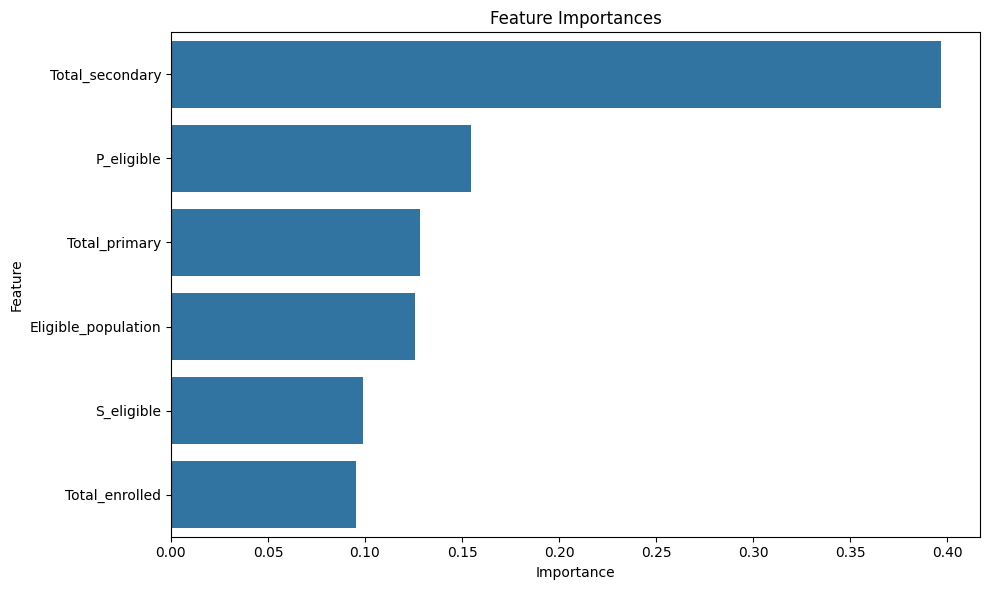

               Feature  Importance
1      Total_secondary    0.397005
3           P_eligible    0.154392
0        Total_primary    0.128239
5  Eligible_population    0.125987
4           S_eligible    0.099120
2       Total_enrolled    0.095257


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load data
primary = pd.read_csv("ethiopia_education_data_Primary.csv")
secondary = pd.read_csv("ethiopia_education_data_Secondary.csv")
population = pd.read_csv("eth_admpop_adm1_2022_v2.csv")

# 2. Rename region columns for consistency
primary = primary.rename(columns={'region': 'Region_name'})
secondary = secondary.rename(columns={'region': 'Region_name'})
population = population.rename(columns={'admin1Name_en': 'Region_name'})

# 3. Extract relevant columns
primary['Total_primary'] = primary['2022/23 Total']
secondary['Total_secondary'] = secondary['2022/23 Total']

# 4. Estimate eligible population
population['P_eligible'] = population['T_07_09'] + population['T_10_14'] if 'T_07_09' in population.columns else population['T_05_09']
population['S_eligible'] = population['T_15_19']

# 5. Create simplified population dataframe
population_data = population[['Region_name', 'P_eligible', 'S_eligible']]

# 6. Merge datasets
merged = pd.merge(primary[['Region_name', 'Total_primary']], 
                  secondary[['Region_name', 'Total_secondary']], 
                  on='Region_name')
merged = pd.merge(merged, population_data, on='Region_name')

# 7. Feature engineering
merged['Total_enrolled'] = merged['Total_primary'] + merged['Total_secondary']
merged['Eligible_population'] = merged['P_eligible'] + merged['S_eligible']
merged['Literacy_percent'] = (merged['Total_enrolled'] / merged['Eligible_population']) * 100

# 8. Clean data
final_df = merged.dropna()

# 9. Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = final_df[['Total_primary', 'Total_secondary', 'Total_enrolled', 
                        'P_eligible', 'S_eligible', 'Eligible_population', 
                        'Literacy_percent']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

# 10. Model training
X = final_df[['Total_primary', 'Total_secondary', 'Total_enrolled', 
              'P_eligible', 'S_eligible', 'Eligible_population']]
y = final_df['Literacy_percent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 12. Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"RÂ² Score: {r2:.2f}")

# 13. Feature importance
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

# 14. Display feature importance table
print(feat_imp_df)


# ðŸ“Š Literacy Analysis Modeling

## ðŸ”§ Data Preparation / Feature Engineering

### 1. Overview
For our Ethiopian literacy rate analysis in the machine learning, we combined enrollment data from the Ministry of Education (MOE) of Ethiopia and eligible population data from HDX (Humanitarian Data Exchange). The goal is to predict literacy rates and understand the gap of education in Ethiopia to address SDG 4. This phase ensures consistency, enhances signal quality, and allows the model to learn meaningful patterns related to literacy rates across regions.


### 2. Data Collection
**Sources**:
- **Education Data (Primary & Secondary)**: Extracted from Ministry of Education (MoE) PDFs, providing regional student enrollment and school counts over multiple academic years.
- **Population Data**: `eth_admpop_adm1_2022_v2.csv` from HDX, offering regional demographic breakdowns (by age/sex).

**Preprocessing**:
- Converted extracted tables to CSV.
- Cleaned numerical fields (e.g., removing commas from enrollment numbers).
- Merged data by administrative region (`region` / `admin1Name_en`).


In [ ]:
import pandas as pd

# Load the datasets
primary_df = pd.read_csv("ethiopia_education_data_Primary.csv")
secondary_df = pd.read_csv("ethiopia_education_data_Secondary.csv")
pop_df = pd.read_csv("eth_admpop_adm1_2022_v2.csv")

# Clean numeric columns (remove commas and convert to int)
for df in [primary_df, secondary_df]:
    for col in df.columns:
        if df[col].dtype == 'object' and col != 'region':
            df[col] = df[col].str.replace(',', '').replace('', '0').astype(int)

primary_df.head()


### 3. Data Cleaning
- Removed commas from numbers and converted to integers.
- Replaced missing values with zero or regional averages where needed.
- Verified consistency in region names and removed rows with complete data absence (e.g., Tigray during conflicts).


### 4. Exploratory Data Analysis (EDA)
Below is a comparison of national total enrollment in primary vs. secondary education from 2018 to 2023.


In [ ]:
import matplotlib.pyplot as plt

years = ['2018/19 Total', '2019/20 Total', '2020/21 Total', '2021/22 Total', '2022/23 Total']

primary_totals = primary_df[years].sum()
secondary_totals = secondary_df[years].sum()

plt.figure(figsize=(10, 6))
plt.plot(years, primary_totals, label='Primary', marker='o')
plt.plot(years, secondary_totals, label='Secondary', marker='o')
plt.title('National Enrollment Trends (Primary vs Secondary)')
plt.xlabel('Academic Year')
plt.ylabel('Total Enrollment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 5. Feature Engineering
New features include:
- **Gross Enrollment Ratio** = `Total Enrollment / Age-Eligible Population`
- **School Density** = `Number of Schools / Total Enrollment`
- **Gender Parity Index** = `Female Enrollment / Male Enrollment`

These metrics are strong proxies for literacy rates across regions.


### 6. Data Transformation
- **Normalization**: Scaled features like enrollment ratio and density using Min-Max Scaling.
- **Encoding**: Ensured consistency in region names for merging.
- **Imputation**: Filled gaps using regional averages where appropriate.


### Model Exploration

### 1. Model Selection and Model Training
We trained two models:
- **Random Forest Regressor**: Robust to overfitting, handles non-linear relationships well.
- **Linear Regression**: Simple, interpretable baseline model.

**Training Details**:
- Dataset split: 80% training, 20% testing
- Normalized features
- Hyperparameters: default for both models (no manual tuning)
- No cross-validation applied in this basic version (could be added for robustness)


### 2. Model Evaluation
We used the following metrics to assess model performance:
- **RÂ² Score**: Indicates the proportion of variance explained by the model.
- **MAE (Mean Absolute Error)**: Average magnitude of error.
- **RMSE (Root Mean Squared Error)**: Penalizes larger errors more.

Below is the evaluation output and feature importance visualization from the Random Forest model.


### 3. Code Implementation

Below are the key code snippets for the entire pipeline, including:
- Data loading and cleaning
- Feature engineering
- Model training and evaluation

Additional visualizations include enrollment trends and feature importance.
